
Found 2 h_*.h5 files.

--- Verifying Mesh File: water_drops_mpi_small/water_drops_mpi_small_mesh.h5 ---
  Vertices shape: (10201, 2)
  First 5 vertices:
[[ 0.  0.]
 [ 5.  0.]
 [10.  0.]
 [15.  0.]
 [20.  0.]]
  Last 5 vertices:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
  Cells shape: (10000, 4)
  First 5 cells:
[[  0   1 102 101]
 [  1   2 103 102]
 [  2   3 104 103]
 [  3   4 105 104]
 [  4   5 106 105]]
  Last 5 cells:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]

--- Verifying Topography File: water_drops_mpi_small/water_drops_mpi_small_topography.h5 ---
  Topography shape (flattened): (100, 100)
  Topography (reshaped 100x100):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


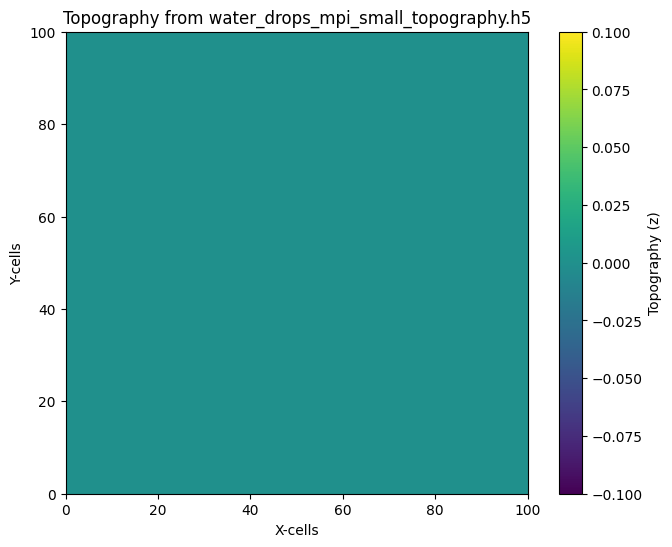


--- Verifying 'h' Timestep Data (up to 1) ---

  Reading h file: water_drops_mpi_small/water_drops_mpi_small_h_0.h5
    h_data shape (flattened): (100, 100)
    h_data (reshaped 100x100):
[[10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 ...
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]]


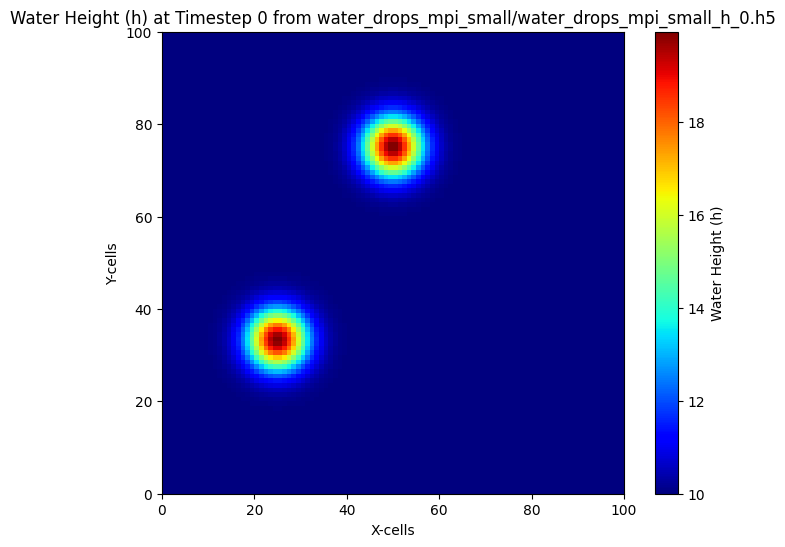


  Reading h file: water_drops_mpi_small/water_drops_mpi_small_h_1.h5
    h_data shape (flattened): (100, 100)
    h_data (reshaped 100x100):
[[10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 ...
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]]


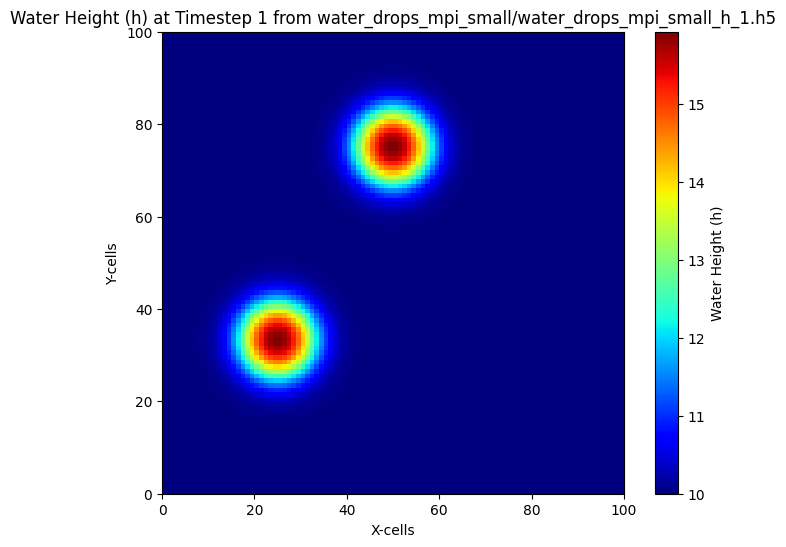

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

def visualize_hdf5_data(base_filename="water_drops_mpi_small", num_timesteps=2, global_nx=10, global_ny=10):
    """
    Reads and visualizes HDF5 data generated by the C++ SWE solver.

    Args:
        base_filename (str): The prefix of the generated files (e.g., "water_drops_mpi_small").
        num_timesteps (int): The number of 'h' timesteps to visualize (e.g., 2 for h_0.h5 and h_1.h5).
        global_nx (int): The global number of cells in the x-direction.
        global_ny (int): The global number of cells in the y-direction.
    """
    output_dir = base_filename

    # --- Verify Mesh Data ---
    mesh_file_path = os.path.join(output_dir, f"{base_filename}_mesh.h5")
    if os.path.exists(mesh_file_path):
        print(f"\n--- Verifying Mesh File: {mesh_file_path} ---")
        try:
            with h5py.File(mesh_file_path, 'r') as f:
                if '/vertices' in f:
                    vertices = f['/vertices'][:]
                    print(f"  Vertices shape: {vertices.shape}")
                    print(f"  First 5 vertices:\n{vertices[:5]}")
                    print(f"  Last 5 vertices:\n{vertices[-5:]}")
                else:
                    print("  /vertices dataset not found.")

                if '/cells' in f:
                    cells = f['/cells'][:]
                    print(f"  Cells shape: {cells.shape}")
                    print(f"  First 5 cells:\n{cells[:5]}")
                    print(f"  Last 5 cells:\n{cells[-5:]}")
                else:
                    print("  /cells dataset not found.")
        except Exception as e:
            print(f"  Error reading mesh file: {e}")
    else:
        print(f"\n--- Mesh file not found: {mesh_file_path} ---")

    # --- Verify Topography Data ---
    topography_file_path = os.path.join(output_dir, f"{base_filename}_topography.h5")
    if os.path.exists(topography_file_path):
        print(f"\n--- Verifying Topography File: {topography_file_path} ---")
        try:
            with h5py.File(topography_file_path, 'r') as f:
                if '/topography' in f:
                    topography = f['/topography'][:]
                    print(f"  Topography shape (flattened): {topography.shape}")
                    # Reshape to 2D for plotting
                    topography_2d = topography.reshape(global_ny, global_nx)
                    print(f"  Topography (reshaped {global_ny}x{global_nx}):\n{topography_2d}")

                    plt.figure(figsize=(8, 6))
                    plt.imshow(topography_2d, origin='lower', cmap='viridis', extent=[0, global_nx, 0, global_ny])
                    plt.colorbar(label='Topography (z)')
                    plt.title(f"Topography from {base_filename}_topography.h5")
                    plt.xlabel("X-cells")
                    plt.ylabel("Y-cells")
                    plt.show()
                else:
                    print("  /topography dataset not found.")
        except Exception as e:
            print(f"  Error reading topography file: {e}")
    else:
        print(f"\n--- Topography file not found: {topography_file_path} ---")


    # --- Verify 'h' Timestep Data ---
    print(f"\n--- Verifying 'h' Timestep Data (up to {num_timesteps-1}) ---")
    for i in range(num_timesteps):
        h_file_path = os.path.join(output_dir, f"{base_filename}_h_{i}.h5")
        if os.path.exists(h_file_path):
            print(f"\n  Reading h file: {h_file_path}")
            try:
                with h5py.File(h_file_path, 'r') as f:
                    if '/h' in f:
                        h_data = f['/h'][:]
                        print(f"    h_data shape (flattened): {h_data.shape}")
                        # Reshape to 2D for plotting
                        h_data_2d = h_data.reshape(global_ny, global_nx)
                        print(f"    h_data (reshaped {global_ny}x{global_nx}):\n{h_data_2d}")

                        plt.figure(figsize=(8, 6))
                        plt.imshow(h_data_2d, origin='lower', cmap='jet', extent=[0, global_nx, 0, global_ny])
                        plt.colorbar(label='Water Height (h)')
                        plt.title(f"Water Height (h) at Timestep {i} from {h_file_path}")
                        plt.xlabel("X-cells")
                        plt.ylabel("Y-cells")
                        plt.show()
                    else:
                        print("    /h dataset not found.")
            except Exception as e:
                print(f"    Error reading h file: {e}")
        else:
            print(f"\n  h file not found: {h_file_path}")

if __name__ == "__main__":
    # Adjust these parameters based on your simulation output
    # For global_nx=10, global_ny=10, and output_n=1, Tend=0.5, you'll have h_0.h5 and h_1.h5, ...
    # So num_timesteps should be at least 2 to see h_0 and h_1.
    # If your simulation runs for 1 step (as in your last output), you'll have h_0.h5 and h_1.h5.
    # If output_n=10, and Tend=0.5, you'll have many more timesteps.

    output_dir = "water_drops_mpi_small"
    base_filename = output_dir

    # To find the number of h_X.h5 files dynamically:
    h_files = [f for f in os.listdir(output_dir) if f.startswith(f"{base_filename}_h_") and f.endswith(".h5")]
    num_timesteps_found = len(h_files)
    print(f"\nFound {num_timesteps_found} h_*.h5 files.")
    # You can then pass num_timesteps_found to visualize_hdf5_data if you want to plot all of them.
    
    # Example for your 10x10 grid, output_n=1, Tend=0.5:
    # You'll have h_0.h5 and h_1.h5 (since it runs for 1 step, it outputs initial h0 and final h1)
    visualize_hdf5_data(base_filename=output_dir, num_timesteps=num_timesteps_found, global_nx=100, global_ny=100)

    # If you run with global_nx=1000, global_ny=1000, output_n=10, Tend=0.01:
    # You'll have h_0.h5 and h_1.h5 (initial and final output).
    # visualize_hdf5_data(base_filename="water_drops_mpi_small", num_timesteps=2, global_nx=1000, global_ny=1000)

    # If you want to visualize more timesteps, adjust num_timesteps accordingly.
    # For example, if you ran for 100 steps and output every 10 steps, you'd have 11 files (0, 10, 20, ..., 100)
    # num_timesteps = (total_sim_steps / output_n) + 1
    # For your 10x10, Tend=0.5, output_n=1: it will generate h_0, h_1, ... h_N.
    # You'll need to know how many actual H5 files are generated.
    # A safer way would be to list files in the directory.
